In [22]:
#importing necessary modules
import tensorflow as tf
import keras
import numpy as np
#from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt


Using TensorFlow backend.


In [2]:
# importing dataset and y values (as one_hot encoded)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
#initializing number of units and number of hidden layers
input_width = 28
input_height = 28
input_channels = 1
input_pixels = 784

n_conv1 = 32
n_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_k = 5
conv2_k = 5
max_pool1_k = 2
max_pool2_k = 2

n_hidden = 512
n_out = 10

input_size_to_hidden = (input_width//(max_pool1_k*max_pool2_k)) * (input_height//(max_pool1_k*max_pool2_k)) *n_conv2

In [4]:
# initializing weights and biases for all the layers

weights = {
    "wc1" : tf.Variable(tf.random_normal([conv1_k, conv1_k, input_channels, n_conv1])),
    "wc2" : tf.Variable(tf.random_normal([conv2_k, conv2_k, n_conv1, n_conv2])),
    "wh1" : tf.Variable(tf.random_normal([input_size_to_hidden, n_hidden])),
    "wo" : tf.Variable(tf.random_normal([n_hidden, n_out]))
}

biases = {
    "bc1" : tf.Variable(tf.random_normal([n_conv1])),
    "bc2" : tf.Variable(tf.random_normal([n_conv2])),
    "bh1" : tf.Variable(tf.random_normal([n_hidden])),
    "bo" : tf.Variable(tf.random_normal([n_out])),
}

In [5]:
# convulational and maxpooling funcion
def conv(x, weights, bias, strides = 1):
    out = tf.nn.conv2d(x, weights, padding="SAME", strides = [1, strides, strides, 1])
    out = tf.nn.bias_add(out, bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding = "SAME", ksize = [1, k, k, 1], strides = [1, k, k, 1])

In [6]:
# forward propagation code 
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_height, input_width, input_channels])
    conv1 = conv(x, weights['wc1'], biases['bc1'], stride_conv1)
    conv1_pool = maxpooling(conv1, max_pool1_k)
    
    conv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], stride_conv2)
    conv2_pool = maxpooling(conv2, max_pool2_k)
    
    hidden_input = tf.reshape(conv2_pool, shape = [-1, input_size_to_hidden])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    hidden_output = tf.nn.dropout(hidden_output_before_dropout, keep_prob) 
   
    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [7]:
# defining x,y as tensorflow placeholder
x = tf.placeholder("float", [None, input_pixels])
y = tf.placeholder(tf.int32, [None, n_out])
keep_prob = tf.placeholder("float")
pred = cnn(x, weights, biases, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#defining the cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels = y))

In [9]:
# defining optimizer based on the predictions and actual_labels using Adam optimizer

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [10]:
# initializing tensorflow session and variables

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
# Running the optimizer for multiple iteration to optimize the cost and training weights on train data in batches
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y, keep_prob:0.8})
        total_cost += c
    print(total_cost)

482878.24706651806
22941.358305498958
11088.65001861751
7063.744024454212
5080.505365922855
4147.176025019808
3440.827178975731
3453.1791093302777
2807.7572422147214
2541.4702445489115
2015.0787969538073
2376.429403272112
1668.690555122569
1407.1194986595453
1197.3036584179226
901.4311929806642
1108.2006017275194
701.7013476459098
432.4388196899431
405.52695088037535
536.0676925762382
273.66929925234035
220.09960216704349
199.18371810682584
235.67216515350447


In [12]:
# Finding the predictions 
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_preds  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels, keep_prob:1.0})
correct_preds.sum()

9305

In [20]:
# Finding the accuracy on the test data
accuracy=(correct_preds.sum()/mnist.test.images.shape[0])
accuracy*100

93.05

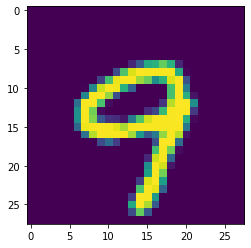

In [23]:
#plotting a testing image from the test data 

first_image=mnist.test.images[58]
first_image=np.array(first_image)
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [25]:
##checking the above image value from the predicitions of our neural network
predictions[58]

9